In [3]:
import numpy as numpy
import pandas as pd

In [4]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

We droped the unnamed columns as they have very less value compared to the first two columns

In [9]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [10]:
df.sample(4)

,target,text
230,ham,Get down in gandhipuram and walk to cross cut ...
3516,ham,So you think i should actually talk to him? No...
1489,ham,Ok i juz receive..
217,ham,Easy ah?sen got selected means its good..


We import label encoder to encode the taget value as 0 or 1 and so

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
#Removing duplicates value and keeping only first value
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# 2. EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x15efd9e20>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

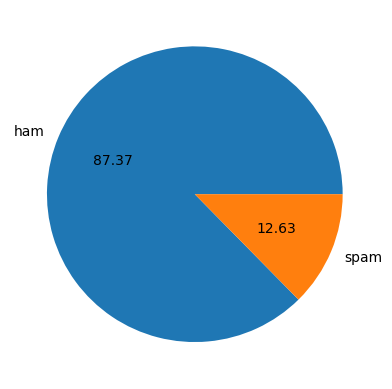

In [21]:
#Ploting pie chart to check distribution of data
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")

In [22]:
#nltk is natural language toolkit is a package used to understand and analyse natural language
import nltk

In [23]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/pankajbora/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/pankajbora/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/pankajbora/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/pankajbora/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/pankajbora/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is alread

True

In [24]:
#Counting number of characters in text
df['num_char'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#We then break the text into tokens over the characters.
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
#we have break the text into number of sentences
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [31]:
#statistic of num of char, word and sentences
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#ham target
df[df['target'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam target
df[df['target'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

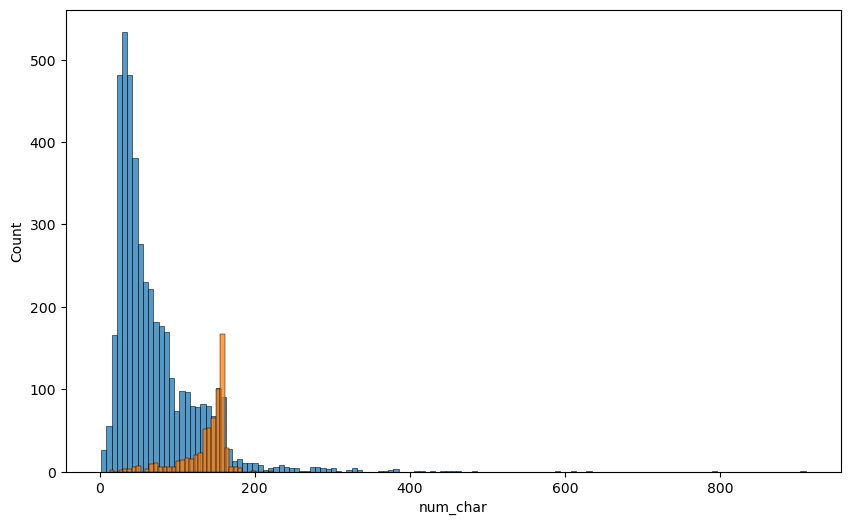

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'])

<Axes: xlabel='num_words', ylabel='Count'>

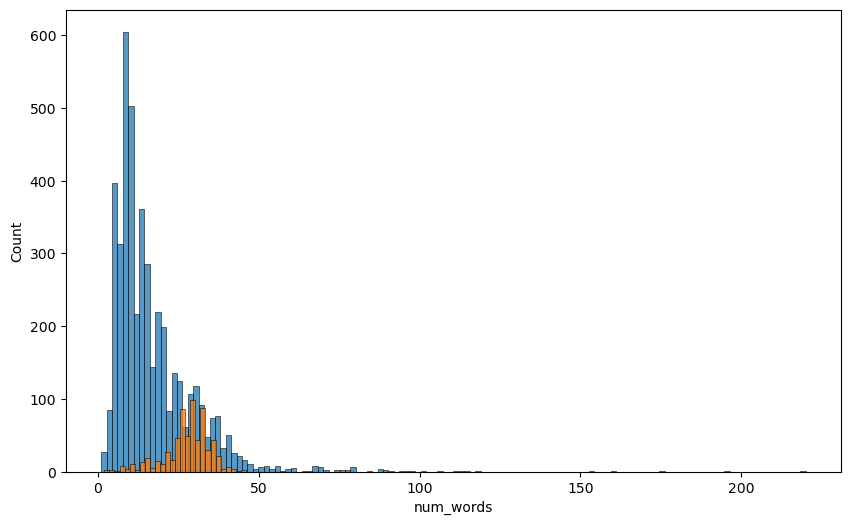

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

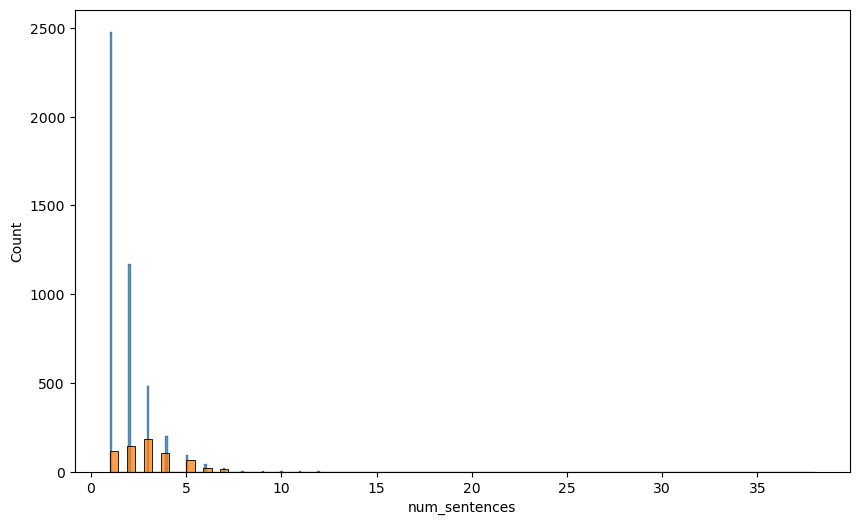

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'])

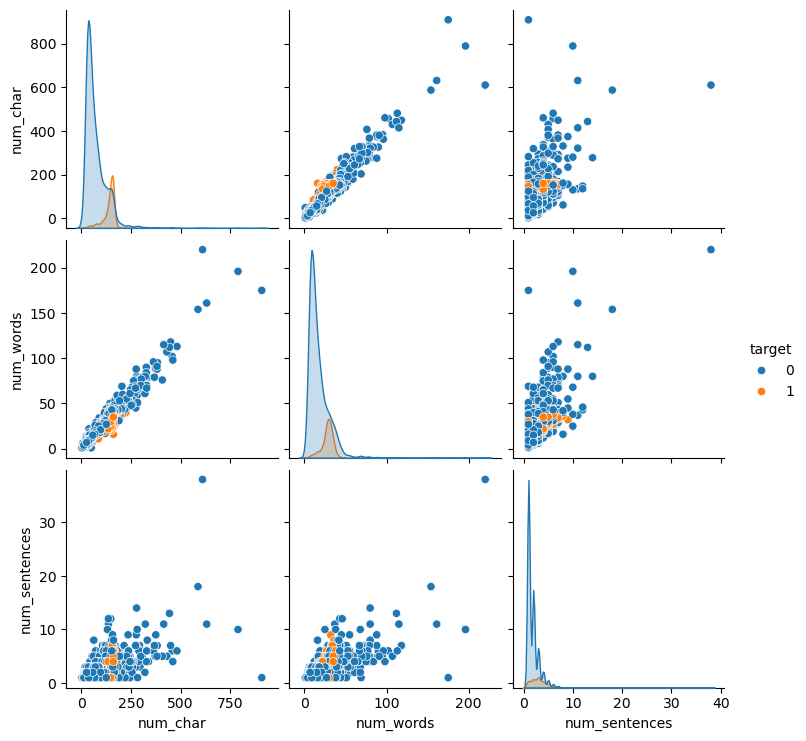

In [38]:
sns.pairplot(df,hue='target')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   target         5169 non-null   int64 
 1   text           5169 non-null   object
 2   num_char       5169 non-null   int64 
 3   num_words      5169 non-null   int64 
 4   num_sentences  5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


In [40]:
df.corr(numeric_only=True)

,target,num_char,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

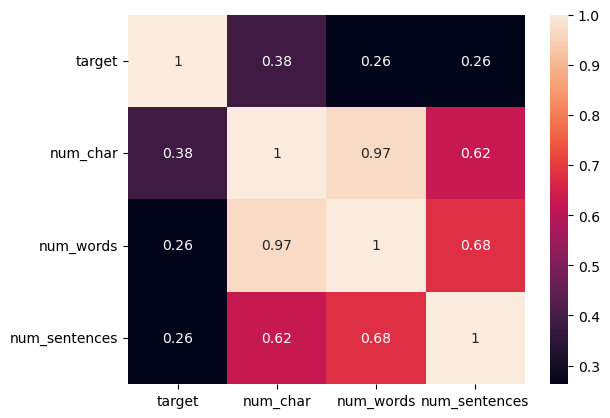

In [41]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# 3. Data Preprocessing

In [42]:
# Lower casing, token creation, removing special character and stemming from text.
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [43]:
transform_text("Hey HOw arE you my name is pankaj bora studied at bbd university a fun loving stundets, ', ")

'hey name pankaj bora studi bbd univers fun love stundet'

In [44]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [45]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


We are making a word cloud for spam and ham from text which shows the main strings(words) used in the individual messages or mail

In [48]:
# pip install wordcloud

In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size = 10, background_color='white')

In [50]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

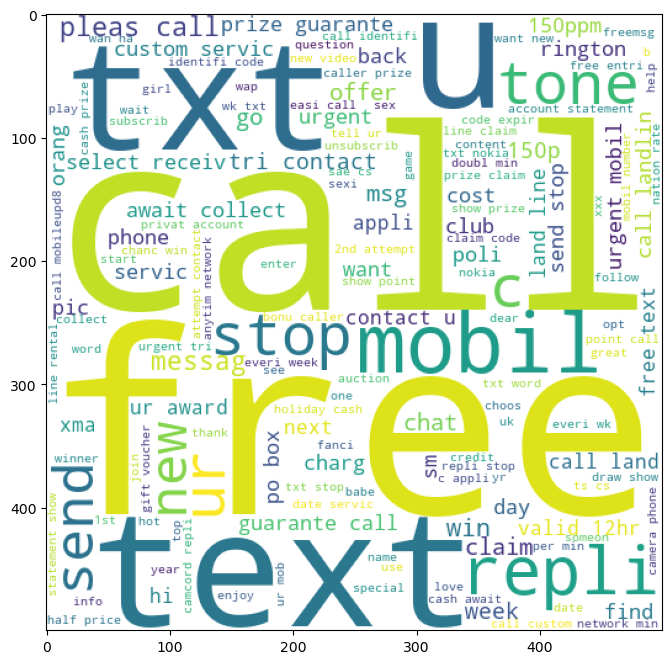

In [51]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

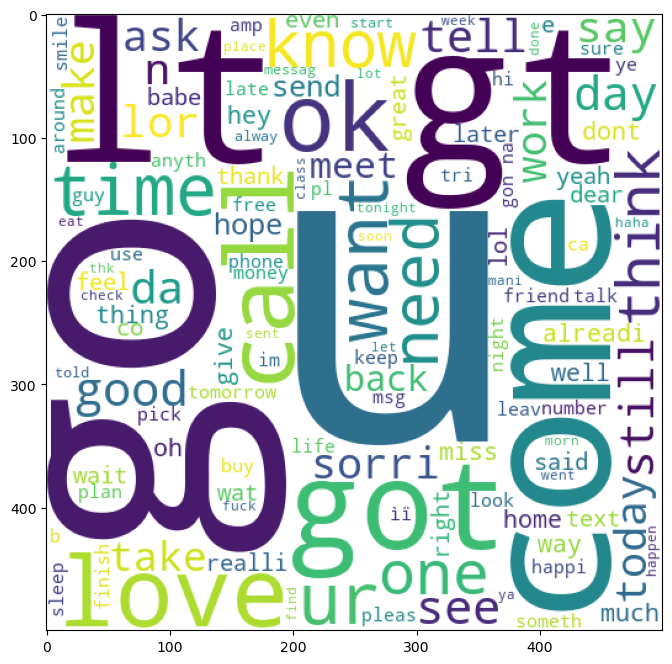

In [53]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [54]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
# Corpus means a collection of words and texts
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [56]:
len(spam_corpus)

9939

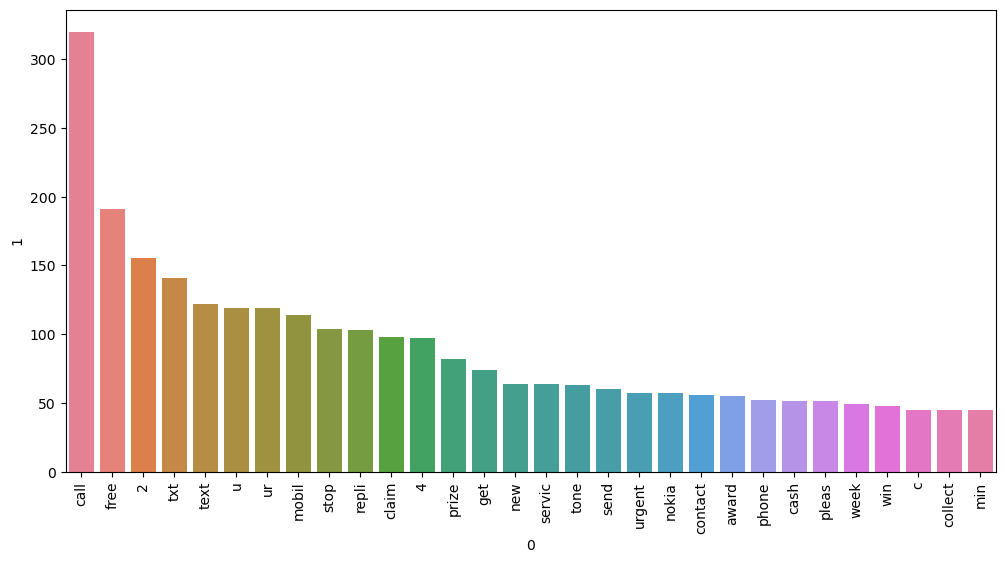

In [57]:
from collections import Counter
# for top 40 words commented code works
# sns.barplot(pd.DataFrame(x=Counter(spam_corpus).most_common(40))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(40))[1])
plt.figure(figsize=(12,6))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1], 
            hue = pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
#  i had used hue here for coloring in barplot
plt.xticks(rotation='vertical')
plt.show()

In [58]:
# Corpus means a collection of words and texts
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [59]:
len(ham_corpus)

35404

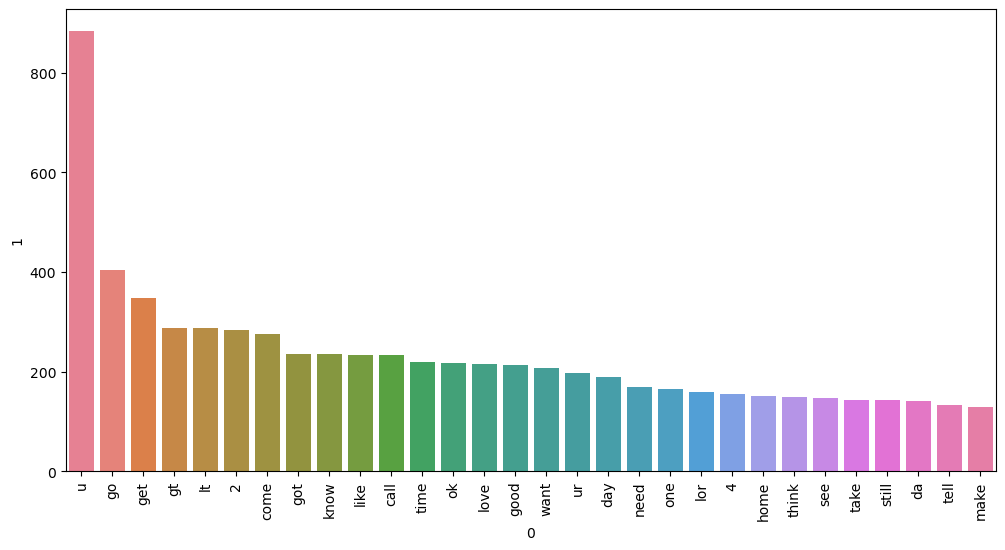

In [60]:
from collections import Counter
# for top 40 words commented code works
# sns.barplot(pd.DataFrame(x=Counter(spam_corpus).most_common(40))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(40))[1])
plt.figure(figsize=(12,6))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1], 
            hue = pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
#  i had used hue here for coloring in barplot
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
X.shape

(5169, 3000)

In [64]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
y = df['target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=2)

In [69]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]


In [71]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [72]:
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [73]:
# tfidf --> mnb

In [74]:
# pip install xgboost

In [75]:
# from sklearn. linear_model import LogisticRegression 
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB 
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn.neighbors import KNeighborsClassifier 
# from sklearn.ensemble import RandomForestClassifier 
# from sklearn.ensemble import AdaBoostClassifier 
# from sklearn.ensemble import BaggingClassifier 
# from sklearn.ensemble import ExtraTreesClassifier 
# from sklearn.ensemble import GradientBoostingClassifier 
# from xgboost import XGBClassifier

In [76]:
# svc = SVC(kernel= 'sigmoid', gamma=1.0)
# knc = KNeighborsClassifier ()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier (max_depth=5)
# lrc = LogisticRegression (solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [77]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc,
#     'NB' : mnb,
#     'DT': dtc,
#     'LR': lrc,
#     'RF': rfc,
#     'AdaBoost' :abc,
#     'BgC': bc,
#     'ETC' : etc,
#     'GBDT' : gbdt,
#     'xgb': xgb
# }

In [78]:
def train_classifier(clf,X_train,y_train,X_test,y_test) :
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score (y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [80]:
# train_classifier(svc, X_train, y_train, X_test, y_test)

In [ ]:
# accuracy_scores = []
# precision_scores = []

# for name, clf in clfs.items():
#     current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

#     print("For :", name)
#     print("Accuracy: ", current_accuracy)
#     print("Precision: ", current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

For : SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865
For : KN
Accuracy:  0.9052224371373307
Precision:  1.0
For : NB
Accuracy:  0.9709864603481625
Precision:  1.0
For : DT
Accuracy:  0.9323017408123792
Precision:  0.8333333333333334
For : LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703
For : RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For : AdaBoost
Accuracy:  0.960348162475822
Precision:  0.9292035398230089
For : BgC
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659
For : ETC
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406
For : GBDT
Accuracy:  0.9468085106382979
Precision:  0.9191919191919192
For : xgb
Accuracy:  0.9671179883945842
Precision:  0.9482758620689655


In [ ]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
# performance_df

In [ ]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
# performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.974855
6,AdaBoost,Accuracy,0.961315
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.951644
9,BgC,Accuracy,0.958414


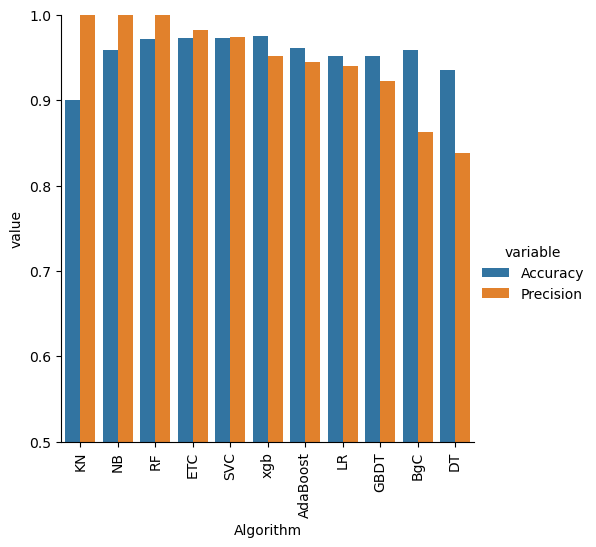

In [ ]:
# sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [ ]:
# model imporvement
# Changed the max_featrue in TfidfVectorizer to provide number of features i want

In [ ]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
# new_df = performance_df.merge(temp_df,on='Algorithm')
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
# new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,xgb,0.974855,0.951613,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
6,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,LR,0.951644,0.940000,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
8,GBDT,0.951644,0.923077,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [ ]:
# #Voting Classifier
# svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier

In [ ]:
# voting = VotingClassifier(estimators=[('svm', svc),('nb',mnb),('et',etc)],voting = "soft")

In [ ]:
# voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
# y_pred = voting.predict(X_test)
# print("Accuracy :", accuracy_score(y_test, y_pred))
# print("Precision :", precision_score(y_test, y_pred))

Accuracy : 0.9816247582205029
Precision : 0.9917355371900827


In [ ]:
#Applying stacking
# estimators=[('svm', svc),('nb',mnb),('et',etc)]
# final_estimator = RandomForestClassifier()

In [ ]:
# from sklearn.ensemble import StackingClassifier
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy :", accuracy_score(y_test, y_pred))
# print("Precision :", precision_score(y_test, y_pred))

Accuracy : 0.9825918762088974
Precision : 0.9568345323741008


In [ ]:
# # 1. Import required libraries
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from imblearn.over_sampling import SMOTE

# # 2. Transform your text column (use your preprocessed version)
# # df['transformed_text'] = df['text'].apply(transform_text)

# # 3. Vectorize the text using TF-IDF
# tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
# X = tfidf.fit_transform(df['transformed_text']).toarray()
# y = df['target']

# # 4. Split into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 5. Apply SMOTE to balance the training set
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # 6. Train the Random Forest model
# model = RandomForestClassifier(n_estimators=200, random_state=42)
# model.fit(X_train_smote, y_train_smote)

# # 7. Predict and evaluate
# y_pred = model.predict(X_test)

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("Accuracy Score:", accuracy_score(y_test, y_pred))

In [ ]:
# Accuracy : 0.9796905222437138
# Precision : 0.9465648854961832

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[894   2]
 [ 43  95]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       896
           1       0.98      0.69      0.81       138

    accuracy                           0.96      1034
   macro avg       0.97      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034



In [ ]:
import pickle
pickle.dump(tfidf,open("Vectorizer.pkl",'wb'))
pickle.dump(mnb,open("model.pkl",'wb'))

In [83]:
import pickle
pickle.dump(model,open("cmodel.pkl",'wb'))